## (Tutorial) Image Gradients
The difference in value between neighboring pixels is called an image gradient.<br>
We'll learn how to compute the image gradients with the following codes

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, color, exposure
import cv2

In [3]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())

In [4]:
### Compute the horizontal gradient using the centered 1D filter.
### This is equivalent to replacing each non-border pixel with the
### difference between its right and left neighbors. The leftmost
### and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [5]:
### Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

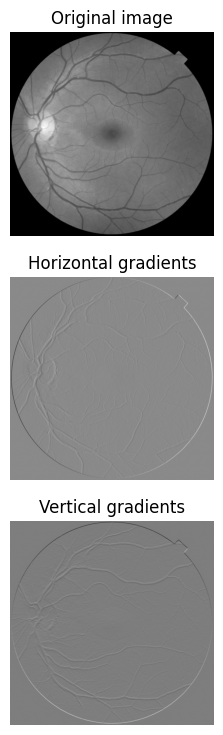

In [6]:
### Matplotlib incantations
fig,  (ax1, ax2, ax3)= plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

## Task 1. Design your code to compute diagonal gradient of the image used in the example and visualize it

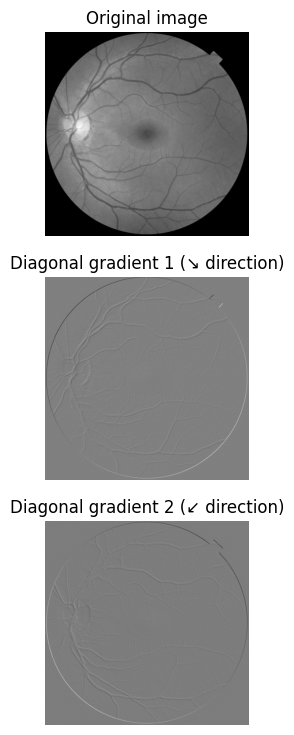

In [13]:
# write your code here
gxy1 = np.empty(image.shape, dtype=np.double)  # ↘ diagonal
gxy2 = np.empty(image.shape, dtype=np.double)  # ↙ diagonal

# Diagonal gradient 1 (↘ direction)
gxy1[:-1, :-1] = image[:-1, :-1] - image[1:, 1:]
gxy1[-1, :] = 0
gxy1[:, -1] = 0

# Diagonal gradient 2 (↙ direction)
gxy2[:-1, 1:] = image[:-1, 1:] - image[1:, :-1]
gxy2[-1, :] = 0
gxy2[:, 0] = 0

fig,  (ax1, ax2, ax3)= plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gxy1, cmap=plt.cm.gray)
ax2.set_title('Diagonal gradient 1 (↘ direction)')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gxy2, cmap=plt.cm.gray)
ax3.set_title('Diagonal gradient 2 (↙ direction)')
ax3.set_adjustable('box')


## **Question 1**. Explain why we don't directly use the simplest image features (color or number of pixels)

**Answer to Q1**: Pixels directly depend on lighting, camera angle, and position.In addition, the simple image features don't bring us much information, in contrast, we focus more on structual information of an image.


---

## (Tutorial) HOG image features

In [14]:
# read image and convert it to grayscale
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

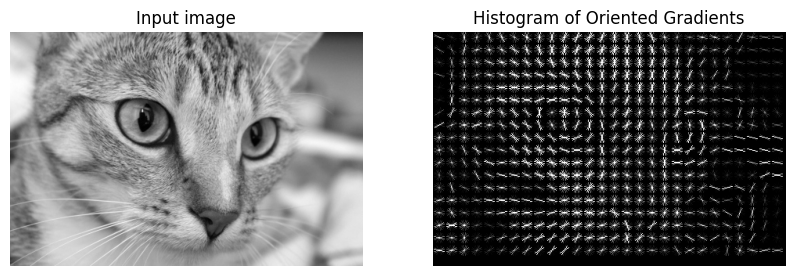

In [15]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## Task 2. ORB keypoints extraction and visualization
Apart from HOG image features, another popular image feature is ORB.<br>
Please extract keypoints from the image used in HOG example using on ORB features and visualize the keypoints on the original image

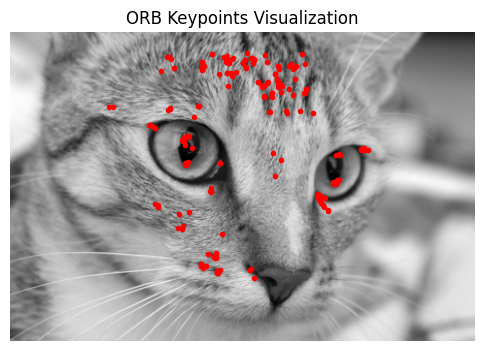

In [23]:
from skimage.feature import ORB

image = color.rgb2gray(data.chelsea())
orb = ORB(n_keypoints=200, fast_threshold=0.05)

# 3️⃣ Detect and extract ORB keypoints/descriptors
orb.detect_and_extract(image)

# 4️⃣ Get the coordinates of detected keypoints
keypoints = orb.keypoints

# 5️⃣ Visualize keypoints on the original image
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(image, cmap='gray')
ax.set_title('ORB Keypoints Visualization')
ax.axis('off')

# Draw small circles for each keypoint
ax.plot(keypoints[:, 1], keypoints[:, 0], 'ro', markersize=3)

plt.show()

## (Tutorial) Bag-of-Visual-Words
In the tutorial code, we create the code words only based on one image

In [16]:
# defining feature extractor that we want to use (ORB feature used in this extractor)
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [17]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [30]:
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
img = data.chelsea()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

Text(0.5, 1.0, 'The histogram of visual words')

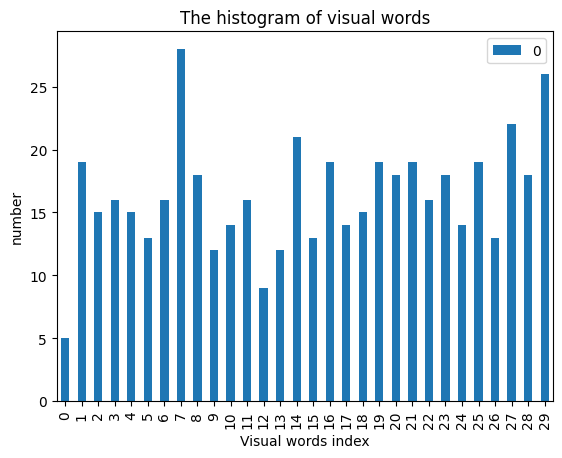

In [31]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Task 3. Bag-of-Visual-Words for multiple images
Create your bag-of-visual-words with 10 images and visualize the histogram of visual words. The 10 images belong to one category(dog, cat, bike, etc.)

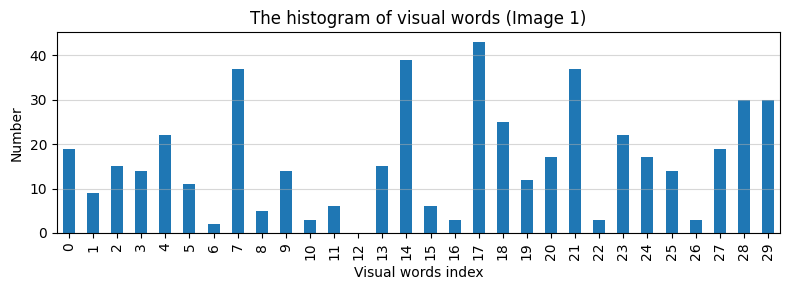

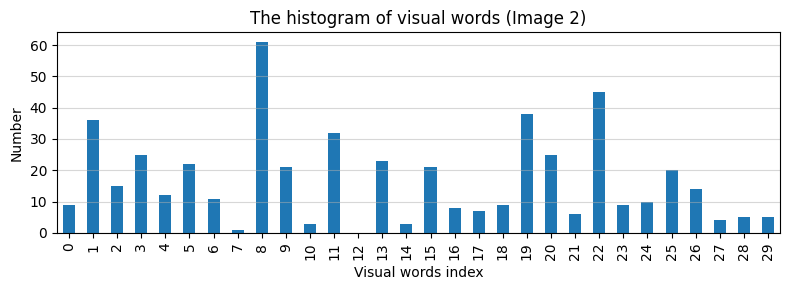

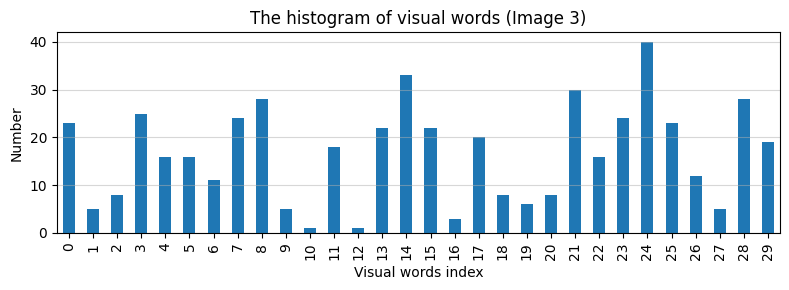

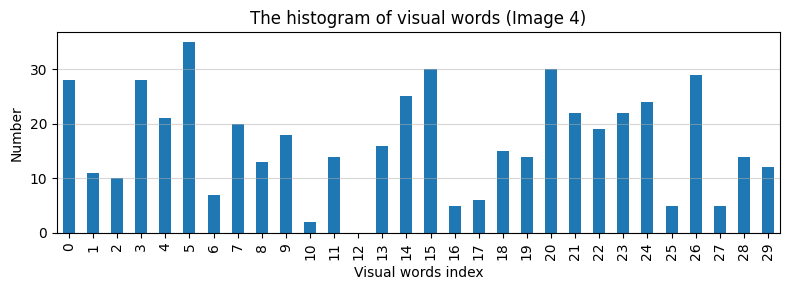

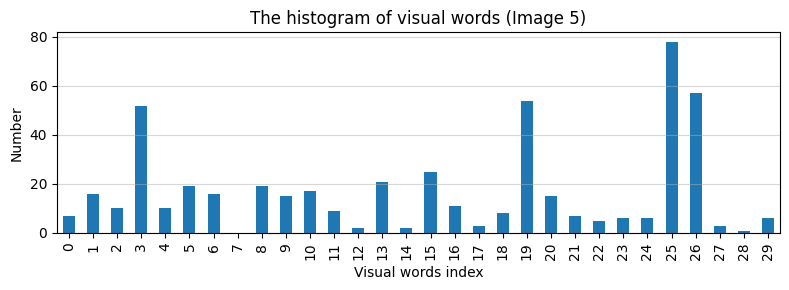

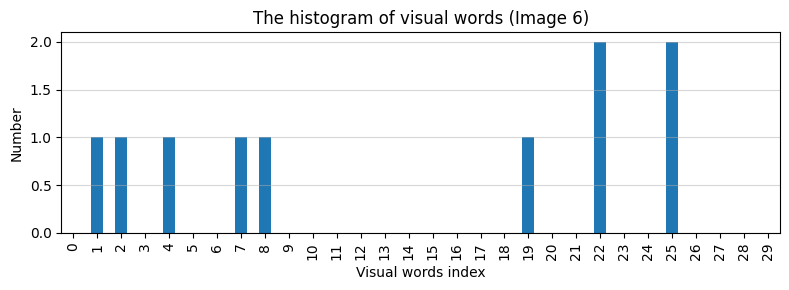

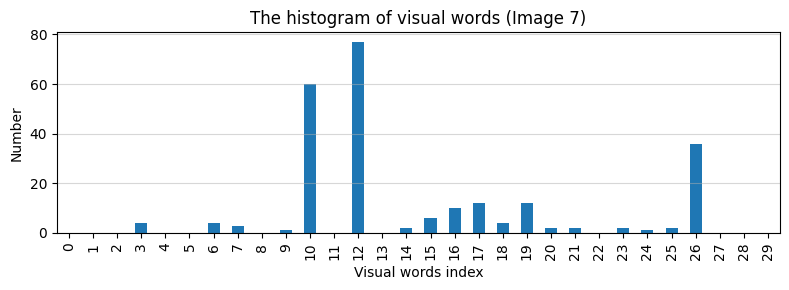

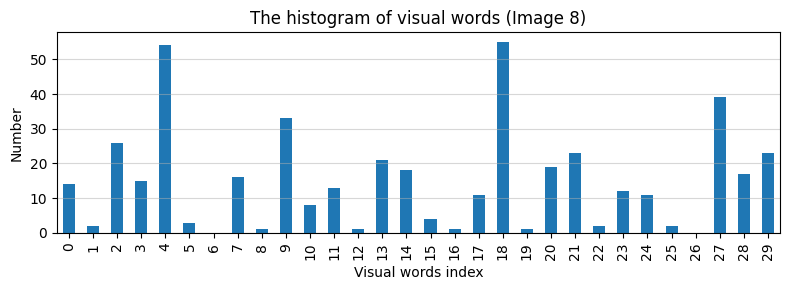

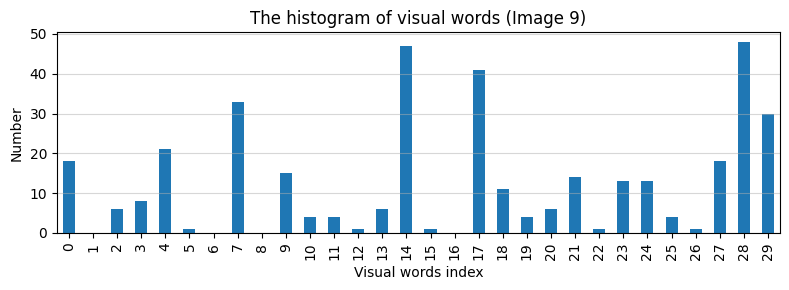

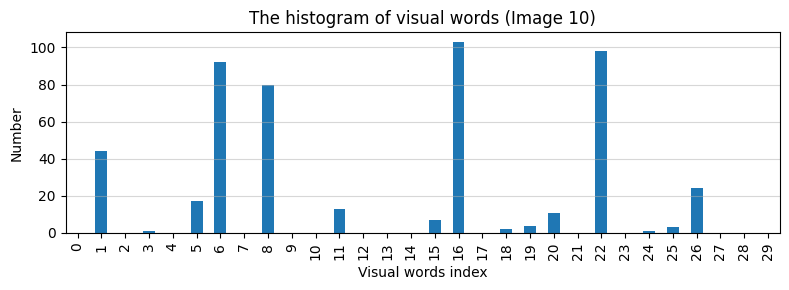

In [35]:
def features(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = (image * 255).astype(np.uint8) if image.dtype != np.uint8 else image
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors
images = [
    data.chelsea(),        # cat
    data.coffee(),
    data.camera(),
    data.astronaut(),
    data.coins(),
    data.clock(),
    data.horse(),
    data.page(),
    data.text(),
    data.hubble_deep_field()
]

# --- 提取所有图片的描述子 ---
descriptor_list_all = []
for img in images:
    kp, des = features(img)
    if des is not None:
        descriptor_list_all.append(des)

all_descriptors = np.vstack(descriptor_list_all)
kmeans = KMeans(n_clusters=30, random_state=42, n_init=10)
kmeans.fit(all_descriptors)
preprocessed_image = []
for image in images:
    keypoint, descriptor = features(image)
    if descriptor is not None:
        histogram = build_histogram(descriptor, kmeans)
        preprocessed_image.append(histogram)

# --- visulazation ---
for i, hist in enumerate(preprocessed_image[:10]):  
    df = pd.DataFrame(hist, columns=['count'])
    df.plot.bar(legend=False, figsize=(8, 3))
    plt.xlabel('Visual words index')
    plt.ylabel('Number')
    plt.title(f'The histogram of visual words (Image {i+1})')
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show()

## Question 2. Recall that the feature scaling does not have a large effect on classification accuracy (tf-idf). How about the effect of feature scaling in Bag-of-Visual-Words? Explain it.

**Answer to Q2**: In TF-IDF: scaling has little effect because features are already normalized and sparse.

In BoVW: scaling has a significant effect because visual descriptors are continuous and unscaled—scaling helps achieve fair distance computation and improves the discriminative power of the model.

---

## Question 3. What is the advantage of ORB(Oriented FAST and Rotated Brief) over SURF (Speeded up robust features). Explain briefly (Minimum of 10 words and maximum of 150 words)

**Answer to Q3**: In BoVW, each image is represented by a histogram of visual word counts, i.e.,

how many keypoint descriptors were assigned to each visual cluster (visual word).

So each feature = “frequency of a visual word.”

## Task 4. Extract text from image
Image file is given in canvas assignment .

Save it in drive and use get shareable link to everyone option . Image file name is **ExtractText4.jpeg**

Please extract the image from image file and print the text that you extracted.

In [40]:
# --- Step 0: Install dependencies if needed ---
# pip install pytesseract pillow opencv-python

import cv2
import pytesseract
from PIL import Image

# --- Step 1: Load image (local path or downloaded from Drive) ---
# Example: if you downloaded it as 'ExtractText4.jpeg'
image_path = "./ExtractText4.jpeg"

# OpenCV loads in BGR, so convert to RGB
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- Step 2: (Optional) Preprocessing to improve OCR ---
# Convert to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
# Apply threshold to remove noise
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# --- Step 3: OCR using pytesseract ---
# If tesseract is not in PATH, specify full path like:
# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

text = pytesseract.image_to_string(gray, lang='eng')

# --- Step 4: Print extracted text ---
print("========== Extracted Text ==========")
print(text)
print("====================================")


========== Extracted Text ==========
ity

Education is the
passport to the future,
for tomorrow belongs
to those who prepare

for it today.

Maicolm X



## Task 5. Design code to implement **ORB** using **OpenCV**. Please use a face image (Preferably your face image as its unique).

Keep your face image file name as **faceimg.jpg**
Save it in drive and use get shareable link to everyone option.

Please print the following during the implementation

* Training image and Testing image

* Number of Keypoints Detected In The Training Image (Not just number image too)

* Number of Keypoints Detected In The Query Image (Not just number image too)

* Number of Matching Keypoints Between The Training and Query Images (Not just number image too)



Number of Keypoints Detected in Training Image: 1000
Number of Keypoints Detected in Query Image: 1000
Number of Matching Keypoints Between Training and Query Image: 486


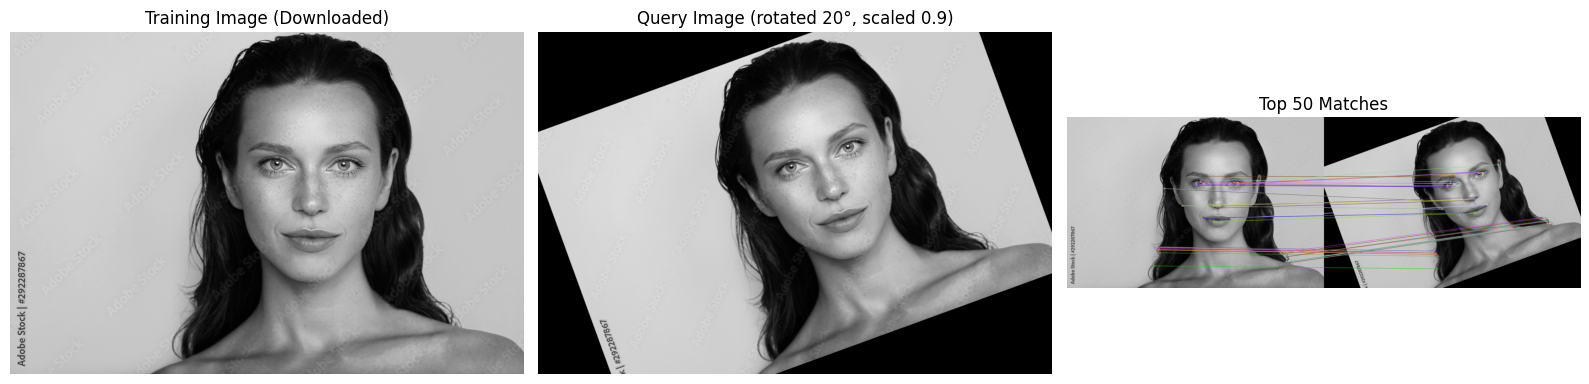

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image

# --------------------------------------------------
# Step 1: I used an online face
# --------------------------------------------------
url = "https://as1.ftcdn.net/v2/jpg/02/92/28/78/1000_F_292287867_hC2Owo0yInRruYbxZXKoJZhB7YUCHdmp.jpg"
response = requests.get(url)
img_pil = Image.open(BytesIO(response.content)).convert('RGB')
# tranform to Opencv format
img = np.array(img_pil)  # RGB
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# --------------------------------------------------
# Step 2: Generate Query image 
# --------------------------------------------------
rows, cols = img_gray.shape
angle = 20  # Rotate 20 degree
scale = 0.9  # Reduce to 90%
M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, scale)
img_query = cv2.warpAffine(img_gray, M, (cols, rows))

# --------------------------------------------------
# Step 3:Extract keypoints + descriptors
# --------------------------------------------------
orb = cv2.ORB_create(nfeatures=1000)

kp1, des1 = orb.detectAndCompute(img_gray, None)
kp2, des2 = orb.detectAndCompute(img_query, None)

print("Number of Keypoints Detected in Training Image:", len(kp1))
print("Number of Keypoints Detected in Query Image:", len(kp2))

# --------------------------------------------------
# Step 4: Match keypoints（Brute-Force + Hamming）
# --------------------------------------------------
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

print("Number of Matching Keypoints Between Training and Query Image:", len(matches))

# --------------------------------------------------
# Step 5: Visualization
# --------------------------------------------------
img_matches = cv2.drawMatches(img_gray, kp1, img_query, kp2, matches[:50], None, flags=2)

plt.figure(figsize=(16, 8))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Training Image (Downloaded)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_query, cmap='gray')
plt.title(f"Query Image (rotated {angle}°, scaled {scale})")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_matches)
plt.title("Top 50 Matches")
plt.axis('off')

plt.tight_layout()
plt.show()
